# main function


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb  4 16:56:55 2021
Ai for Alpha
Copyright Thu Aug  2021
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

'''
compute strategy returns from weights
- inputs returns, weights
'''
def portfolio_returns(returns, weights, cost, daylag=1):
    if returns.shape[0] > weights.shape[0]:
        returns = returns.loc[weights.index]
    if type(returns) == pd.core.series.Series:
        returns = returns.to_frame()
    if type(weights) == pd.core.series.Series:
        weights = weights.to_frame()
    strategyReturn = returns * weights.shift(1 + daylag)
    dfPreviousWeights = weights.shift(daylag)
    transactionCost = (weights-dfPreviousWeights).mul(cost, axis=1).abs()
    netStrategyReturns=strategyReturn-transactionCost
    return netStrategyReturns

'''
compute strategy
'''
def compute_strategy(df, weights, cost=0, daylag=1):
    returns = df.pct_change().fillna(0) 
    strat_returns = portfolio_returns(returns, weights, cost, daylag)
    strategy = (1 + strat_returns.sum(axis=1).fillna(0)).cumprod().iloc[daylag:]
    return strategy 

'''
generic function to read data
'''
def read_data(filename):
    df = pd.read_csv(f'..//data//{filename}', index_col=0, dayfirst=True, parse_dates=True)
    return df

# read data and allocations

In [2]:
prices = read_data('strategies-v2.csv')
dfWeights = read_data('weights-v2.csv')
cost = 0.0005 # 5 bps
# round weights!
track_record = compute_strategy(prices, dfWeights, cost=cost, daylag=5)
track_record.name = 'AI for Alpha'

# read benchmark and reindex

In [3]:
df_benchmark = read_data('benchmark.csv')
# need to reindex as track record starts earlier!
df_benchmark = df_benchmark / df_benchmark.iloc[0] * track_record.loc[df_benchmark.index[0]]
df_benchmark = df_benchmark.reindex(track_record.index).fillna(method='ffill')
df_benchmark.columns = ['Benchmark']

# concatenate track and benchmark

In [4]:

total_df = pd.concat([track_record, df_benchmark], axis=1)

# plot

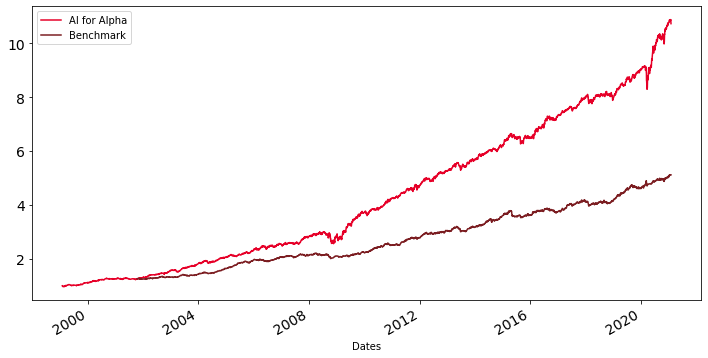

last values
AI for Alpha    10.721876
Benchmark        5.115415
Name: 2021-01-29 00:00:00, dtype: float64


In [5]:
SGColors = {'SG_Beige': "#D6C292",
                'SG_Black': "#17202A",
                'SG_Brown': "#7B1D21",
                'SG_Brown2': "#A66B02",
                'SG_DarkBeige': "#BD9C4F",
                'SG_DarkGrey': "#212F3D",
                'SG_Green': "#2D575B",
                'SG_Grey': "#C1BCBC",
                'SG_Grey2': "#938A8A",
                'SG_LightTeal': "#B8D8DC",
                'SG_MidGrey': "#566573",
                'SG_Red': "#E60028",
                'SG_Red2': "#D65258",
                'SG_Teal': "#519BA5",
                'SG_Tomato': "#E38A8E",
                'SG_LightGrey': "#D3D3D3"}    
total_df.plot(figsize=(12,6), color =[SGColors['SG_Red'], 
            SGColors['SG_Brown']],
    fontsize=14,)
plt.show()

print('last values')
print(total_df.iloc[-1])


# save results

In [6]:
track_record.to_csv('../data/track_record-v2.csv')